In [1]:
import sys
sys.path.insert(0, '..') # add root to load path

# Basic LLM usage
`ConstructorModel` provides access to the Constructor Knowledge Model API as a LangChain model.

You can use it to query many different models.

In [2]:
from accra_code.lc_integration.constructor_chat_model import ConstructorModel

model = ConstructorModel()
model.invoke("Hi! Do you know Python?")

code__init__


AIMessage(content='Hi there! Yes, I know Python. How can I help you with it?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 0, 'prompt_tokens': 0, 'total_tokens': 0, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini', 'system_fingerprint': None, 'id': '34c220bf15f547e0a1c7d13dfadd932f', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--9c0d416b-c066-4da1-89f1-3e717dc3f5e9-0', usage_metadata={'input_tokens': 0, 'output_tokens': 0, 'total_tokens': 0, 'input_token_details': {}, 'output_token_details': {}})

# Tool wrapper
Currently, the API does not fully support the OpenAI `tools` API parameter.

As a replacement, we can implement a custom wrapper. You can take a look at the wrapper source code `accra_code/lc_integration/tool_aware.py`

In [3]:
from langchain.tools import tool
from langchain_core.messages import (HumanMessage, SystemMessage)

from accra_code.lc_integration.tool_aware import create_tool_aware_agent

@tool
def city_by_qwe_coordinates(q: float, w: float, e: float) -> str:
    """Get city name by its QWE coordinates. It is a new format and no LLM knows about it"""
    return "San Francisco"

@tool
def get_weather(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

# Create agent graph
agent = create_tool_aware_agent(
    model=model,
    tools=[get_weather, city_by_qwe_coordinates]
)

# Use it
result = agent.invoke(
    agent.setup_state(
        messages=[
            SystemMessage("Your reasoning must be to the point. Use mathematical words if needed"),
            HumanMessage("what is the weather in the city at QWE(1, 3, 3)? Answer using one word")
        ],
    )
)

for m in result['messages']:
    m.pretty_print()

================================ System Message ================================

Your reasoning must be to the point. Use mathematical words if needed
================================ Human Message =================================

what is the weather in the city at QWE(1, 3, 3)? Answer using one word
================================== Ai Message ==================================

Reasoning: To find the weather in the city at the specified QWE coordinates, I need to first determine the city name using those coordinates.
Tool Calls:
  city_by_qwe_coordinates (call_0000)
 Call ID: call_0000
  Args:
    q: 1
    w: 3
    e: 3
================================= Tool Message =================================
Name: city_by_qwe_coordinates

San Francisco
================================== Ai Message ==================================

Reasoning: The city corresponding to the QWE coordinates (1, 3, 3) is San Francisco. Now, I will retrieve the weather for San Francisco.
Tool Calls:
  get_wea

`agent` implements the ReAct pattern <https://docs.langchain.com/oss/python/langchain/agents>

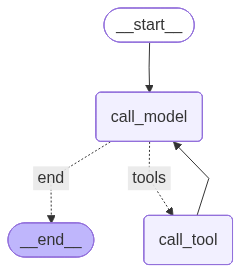

In [4]:
agent